In [272]:
import os
from datetime import datetime as dt 
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import duckdb
import matplotlib.dates as mdates

In [273]:
def korea_events_reader(filename):
    current_path = os.getcwd()
    return current_path + "/" + filename
file_paths = ["Kpop events 2017.csv", "Kpop events 2018.csv", "Kpop events 2019.csv", 
              "Kpop events 2020.csv", "Kpop events 2021.csv", "Kpop events 2022.csv", 
              "Kpop events 2023.csv"]
events_2017 = pd.read_csv(korea_events_reader(file_paths[0]))
events_2018 = pd.read_csv(korea_events_reader(file_paths[1]))
events_2019 = pd.read_csv(korea_events_reader(file_paths[2]))
events_2020 = pd.read_csv(korea_events_reader(file_paths[3]))
events_2021 = pd.read_csv(korea_events_reader(file_paths[4]))
events_2022 = pd.read_csv(korea_events_reader(file_paths[5]))
events_2023 = pd.read_csv(korea_events_reader(file_paths[6]))


In [274]:
#def remove_south_korea_rows(df):
#    df['Country'] = df['Country'].str.replace(' ', '')  # Remove white spaces from the 'Country' column
#    df = df[~df['Country'].str.contains('SouthKorea|Korea|SouthKorea', case=False)]  # Filter out rows containing 'SouthKorea' or 'Korea'
 #   return df
def fix_south_korea(df):
    df['Country'] = df['Country'].str.replace(' ', '')  # Remove white spaces from the 'Country' column
    df['Country'] = df['Country'].str.replace('SouthKorea', 'South Korea', case=False)  # Replace 'SouthKorea' with 'South Korea' (case-insensitive)
    df['Country'] = df['Country'].str.replace(r'(?<!South)Korea', 'South Korea', case=False)  # Replace 'Korea' with 'South Korea' if not preceded by 'South' (case-insensitive)
    return df   
#events_2017 = remove_south_korea_rows(events_2017)
#events_2018 = remove_south_korea_rows(events_2018)
#events_2019 = remove_south_korea_rows(events_2019)
#events_2020 = remove_south_korea_rows(events_2020)
#events_2021 = remove_south_korea_rows(events_2021)
#events_2022 = remove_south_korea_rows(events_2022)
#events_2023 = remove_south_korea_rows(events_2023)
events_2017 = fix_south_korea(events_2017)
events_2018 = fix_south_korea(events_2018)
events_2019 = fix_south_korea(events_2019)
events_2020 = fix_south_korea(events_2020)
events_2021 = fix_south_korea(events_2021)
events_2022 = fix_south_korea(events_2022)
events_2023 = fix_south_korea(events_2023)

In [275]:
def fix_dates(row):
    if row['Date(s)'] in ['Mon', 'Tue', 'Wed', 'Thu', 'Thur', 'Fri', 'Sat', 'Sun']:
        return row['Artist / Guest']
    else:
        return row['Date(s)']

# Applying the function to the Date(s) column
events_2017['Date(s)'] = events_2017.apply(fix_dates, axis=1)

In [276]:
"""
This line of code checks for any dates where there is a range of Days given, like Sep 23-24 and fixes 
it by removing everything after the hyphen
"""
events_2017['Date(s)'] = events_2017['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)


In [277]:
year = 2017
events_2017['Date(s)'] = events_2017['Date(s)'].apply(lambda x: x + f'-{year}' if '-' not in x else x + f'-{year}')

In [278]:
events_2017['Date(s)'] = pd.to_datetime(events_2017['Date(s)'], format='mixed')

In [279]:
print(events_2017["Date(s)"])

0     2017-09-12
1     2017-10-04
2     2017-08-08
3     2017-08-12
4     2017-09-22
         ...    
351   2017-09-17
352   2017-11-09
353   2017-05-05
354   2017-05-07
355   2017-05-10
Name: Date(s), Length: 356, dtype: datetime64[ns]


In [280]:
print(events_2017['Date(s)'].isna().sum())

0


In [281]:
events_2018['Date(s)'] = events_2018['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)

In [282]:
year2 = 2018
events_2018['Date(s)'] = events_2018['Date(s)'].apply(lambda x: x + f'-{year2}' if '-' not in x else x + f'-{year2}')

In [283]:
events_2018['Date(s)'] = pd.to_datetime(events_2018['Date(s)'], format='mixed')

In [284]:
events_2019['Date(s)'] = events_2019['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
year3 = 2019
events_2019['Date(s)'] = events_2019['Date(s)'].apply(lambda x: x + f'-{year3}' if '-' not in x else x + f'-{year3}')
events_2019['Date(s)'] = pd.to_datetime(events_2019['Date(s)'], format='mixed')

In [285]:
events_2020['Date(s)'] = events_2020['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
year4 = 2020
events_2020['Date(s)'] = events_2020['Date(s)'].apply(lambda x: x + f'-{year4}' if '-' not in x else x + f'-{year4}')
events_2020['Date(s)'][29] = "Mar 01-2018" #Manually changed this one as the original value was formatted
#in an awkward way
events_2020['Date(s)'] = pd.to_datetime(events_2020['Date(s)'], format='mixed')



In [286]:
events_2021['Date(s)'] = events_2021['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
year5 = 2021
events_2021['Date(s)'] = events_2021['Date(s)'].apply(lambda x: x + f'-{year5}' if '-' not in x else x + f'-{year5}')
events_2021['Date(s)'] = pd.to_datetime(events_2021['Date(s)'], format='mixed')


In [287]:
events_2022['Date(s)'] = events_2022['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
year6 = 2022
events_2022['Date(s)'] = events_2022['Date(s)'].apply(lambda x: x + f'-{year6}' if '-' not in x else x + f'-{year6}')
mask = ~events_2022['Date(s)'].str.contains('TBA-2022')
events_2022 = events_2022[mask]
events_2022['Date(s)'][647] = 'Apr 15-2022'
events_2022['Date(s)'] = pd.to_datetime(events_2022['Date(s)'], format='mixed')

In [288]:
events_2023['Date(s)'] = events_2023['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
year6 = 2023
events_2023['Date(s)'] = events_2023['Date(s)'].apply(lambda x: x + f'-{year6}' if '-' not in x else x + f'-{year6}')
mask2 = ~events_2023['Date(s)'].str.contains('TBA-2023')
events_2023 = events_2023[mask2]
mask3 = ~events_2023['Date(s)'].str.contains('Q4 2023-2023')
events_2023 = events_2023[mask3]
mask4 = ~events_2023['Date(s)'].str.contains('Subconscious')
events_2023 = events_2023[mask4]
events_2023['Date(s)'][23] = 'Dec 7-2023'
events_2023['Date(s)'] = pd.to_datetime(events_2023['Date(s)'], format='mixed')
#Deleting rows where the event has not happened yet; 
events_2023 = events_2023[events_2023['Date(s)'] <= pd.to_datetime('2023-08-30')]

In [289]:
events_2023.head(-3)

,Country,Type,Date(s),Artist / Guest,Event Name,Location,Venue + Map
3,Brazil,Concert,2023-02-06,TWICE,READY TO BE,"Sao Paulo, BR",Allianz Parque
4,Canada,Festival,2023-06-10,"Kwon Eunbi, KINGDOM",K-Fest,"Ottawa, ON",Landsdowne Park
11,HongKong,Concert,2023-01-20,SEVENTEEN,FOLLOW' Tour,Macau,NaN


In [290]:
data_frames = [events_2017, events_2018, events_2019, events_2020, events_2021, events_2022, events_2023]
merged_df = pd.concat(data_frames, ignore_index=True)

In [291]:
merged_df = duckdb.sql("SELECT * FROM merged_df ORDER BY 'Date(s)'").df()

In [292]:
#merged_df = merged_df[(merged_df['Country'] != 'South Korea') & (merged_df['Country'] != 'Korea')]
# List of DataFrames
#dataframes = [events_2017, events_2018, events_2019, events_2020, events_2021, events_2022, events_2023]

# Countries to remove
#countries_to_remove = ['South Korea', 'Korea']

# Remove rows from each DataFrame and apply data cleaning
#for df in dataframes:
   # df = df[(df['Country'].str.strip().str.lower() != 'south korea') & (df['Country'].str.strip().str.lower() != 'korea')]
   # df['Country'] = df['Country']

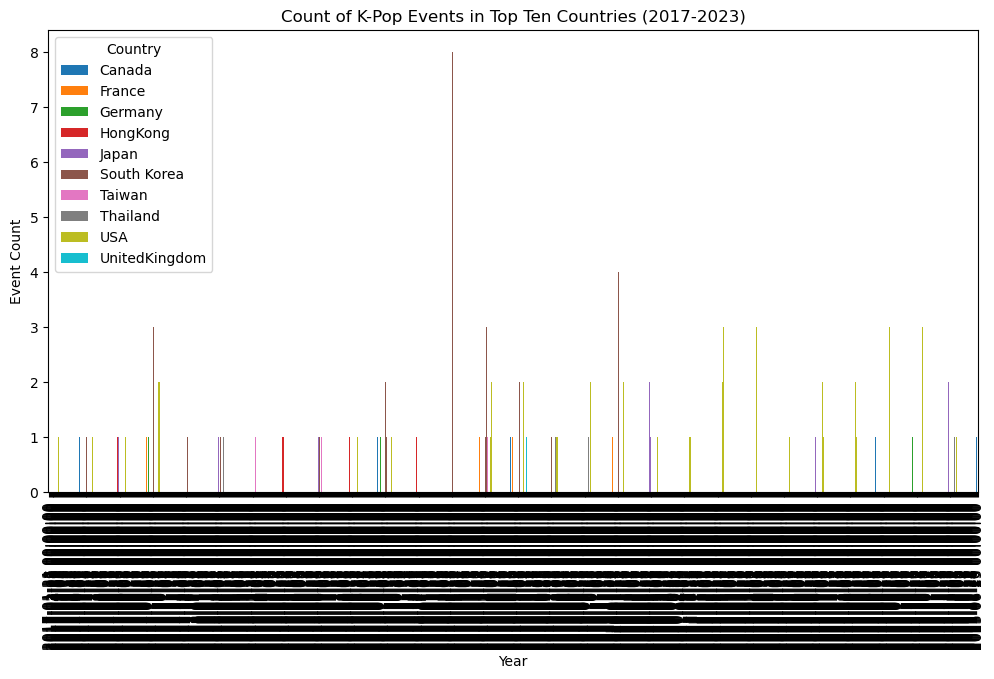

In [293]:
df_counts = merged_df.groupby(['Country', 'Date(s)']).size().reset_index(name='Event Count')

# Selecting the top ten countries
top_countries = df_counts.groupby('Country')['Event Count'].sum().nlargest(10).index

# Filtering the data for the top ten countries
df_top_countries = df_counts[df_counts['Country'].isin(top_countries)]

# Plotting the bar chart for the top ten countries
df_top_countries.pivot(index='Date(s)', columns='Country', values='Event Count').plot(kind='bar', figsize=(12, 6))
plt.title('Count of K-Pop Events in Top Ten Countries (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.show()

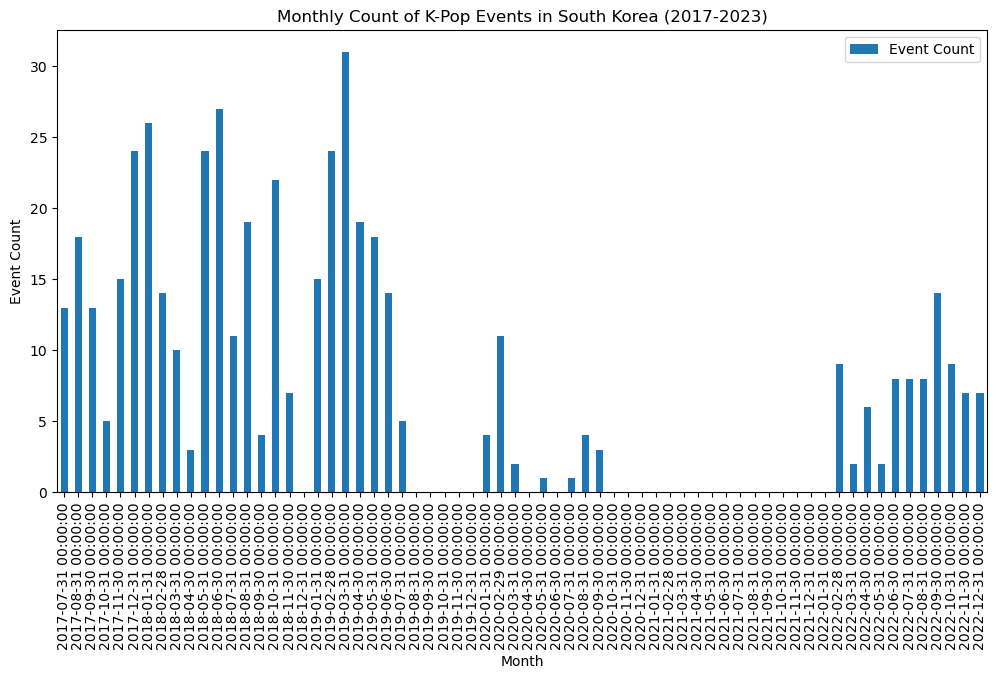

In [295]:
df_south_korea = df_counts[df_counts['Country'] == 'South Korea']

# Set 'Date(s)' column as the index
df_south_korea = df_south_korea.set_index('Date(s)')

# Resample data on a monthly basis and sum the event counts
df_south_korea_monthly = df_south_korea.resample('M').sum()

# Plotting the bar chart for monthly K-Pop events in South Korea
df_south_korea_monthly.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Count of K-Pop Events in South Korea (2017-2023)')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.show()

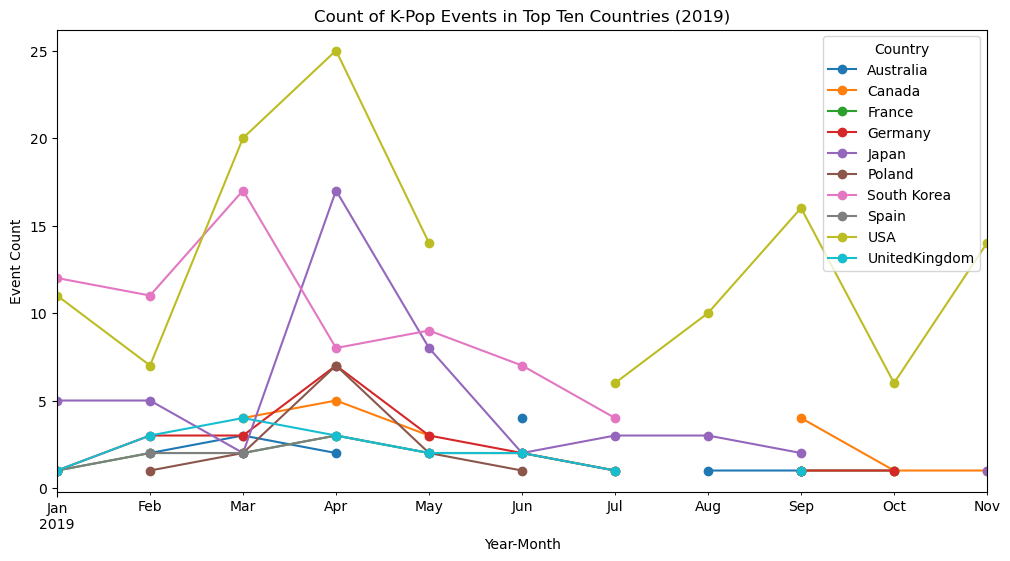

In [260]:
df_counts = events_2019.groupby(['Country', 'Date(s)']).size().reset_index(name='Event Count')

# Selecting the top ten countries
df_counts_month = df_counts.groupby(['Country', pd.Grouper(key='Date(s)', freq='M')]).size().reset_index(name='Event Count')

# Selecting the top ten countries
top_countries = df_counts_month.groupby('Country')['Event Count'].sum().nlargest(10).index

# Filtering the data for the top ten countries
df_top_countries_month = df_counts_month[df_counts_month['Country'].isin(top_countries)]

# Plotting the line chart for the top ten countries
df_top_countries_month.pivot(index='Date(s)', columns='Country', values='Event Count').plot(kind='line', figsize=(12, 6), marker = 'o')
plt.title('Count of K-Pop Events in Top Ten Countries (2019)')
plt.xlabel('Year-Month')
plt.ylabel('Event Count')
plt.show()

In [261]:
#merged_df = remove_south_korea_rows(merged_df)

In [262]:
from collections import Counter

artists_total = []
for i in merged_df['Artist / Guest']:
    artists_total.append(i.lower())

artist_counts = dict(Counter(artists_total))

sorted_artist_counts = sorted(artist_counts.items(), key=lambda item: item[1], reverse=True)

In [263]:
events_2019.head()

,Country,Type,Date(s),Artist / Guest,Event Name,Location,Venue + Map
0,Australia,Concert,2019-02-21,Stray Kids,I Am,Melbourne VIC,Festival Hall
1,Australia,Concert,2019-03-11,Eric Nam,I Color U,Melbourne VIC,170 Russell
2,Australia,Concert,2019-06-08,Monsta X,We Are Here,Melbourne VIC,[TBD]()
3,Australia,Concert,2019-06-13,Blackpink,In Your Area,Melbourne VIC,Rod Laver Arena
4,Australia,Concert,2019-09-01,Dreamcatcher,Invitation from Nightmare City,"Melbourne, Australia",170 Russell


In [264]:
merged_df.head()

,Country,Type,Date(s),Artist / Guest,Event Name,Location,Venue + Map,Tickets,Official
0,Argentina,Concert,2017-09-12,Monsta X,Beautiful,"Buenos Aires, Argentina",Luna Park,---,MyMusicTaste
1,Argentina,Concert,2017-10-04,K.A.R.D,Wild Kard Pt.2,"Buenos Aires, Argentina",Teatro Vorterix,AllAccess,MyMusicTaste
2,Australia,Concert,2017-08-08,G-Dragon,"Act III, M.O.T.T.E.","Brisbane, Australia",Brisbane Entertainment Centre,LiveNation,---
3,Australia,Concert,2017-08-12,G-Dragon,"Act III, M.O.T.T.E.","Melbourne, Australia",Hisense Arena,LiveNation,---
4,Australia,Concert,2017-09-22,Various,KCON,Sydney,Qudos Bank Arena,Ticketek,FB


In [265]:
merged_df.drop(['Tickets', 'Official'], axis=1)
merged_df.head()

,Country,Type,Date(s),Artist / Guest,Event Name,Location,Venue + Map,Tickets,Official
0,Argentina,Concert,2017-09-12,Monsta X,Beautiful,"Buenos Aires, Argentina",Luna Park,---,MyMusicTaste
1,Argentina,Concert,2017-10-04,K.A.R.D,Wild Kard Pt.2,"Buenos Aires, Argentina",Teatro Vorterix,AllAccess,MyMusicTaste
2,Australia,Concert,2017-08-08,G-Dragon,"Act III, M.O.T.T.E.","Brisbane, Australia",Brisbane Entertainment Centre,LiveNation,---
3,Australia,Concert,2017-08-12,G-Dragon,"Act III, M.O.T.T.E.","Melbourne, Australia",Hisense Arena,LiveNation,---
4,Australia,Concert,2017-09-22,Various,KCON,Sydney,Qudos Bank Arena,Ticketek,FB


In [266]:
merged_df.head(-2)

,Country,Type,Date(s),Artist / Guest,Event Name,Location,Venue + Map,Tickets,Official
0,Argentina,Concert,2017-09-12,Monsta X,Beautiful,"Buenos Aires, Argentina",Luna Park,---,MyMusicTaste
1,Argentina,Concert,2017-10-04,K.A.R.D,Wild Kard Pt.2,"Buenos Aires, Argentina",Teatro Vorterix,AllAccess,MyMusicTaste
2,Australia,Concert,2017-08-08,G-Dragon,"Act III, M.O.T.T.E.","Brisbane, Australia",Brisbane Entertainment Centre,LiveNation,---
3,Australia,Concert,2017-08-12,G-Dragon,"Act III, M.O.T.T.E.","Melbourne, Australia",Hisense Arena,LiveNation,---
4,Australia,Concert,2017-09-22,Various,KCON,Sydney,Qudos Bank Arena,Ticketek,FB
...,...,...,...,...,...,...,...,...,...
2688,France,Concert,2022-04-17,MCND,Europe Tour 2022,"Toulon, FR",Mang'Azur @ Palais Congres Neptune,NaN,NaN
2689,Brazil,Concert,2023-02-06,TWICE,READY TO BE,"Sao Paulo, BR",Allianz Parque,NaN,NaN
2690,Canada,Festival,2023-06-10,"Kwon Eunbi, KINGDOM",K-Fest,"Ottawa, ON",Landsdowne Park,NaN,NaN
2691,HongKong,Concert,2023-01-20,SEVENTEEN,FOLLOW' Tour,Macau,NaN,NaN,NaN


In [267]:
merged_df["Date(s)"].dtype

dtype('<M8[ns]')

In [268]:
for i in merged_df['Country']:
    if i == "South South Korea":
        print(i)